<a href="https://colab.research.google.com/github/Berkay86/DeepPerson/blob/main/TICTACTOE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
veri = pd.read_excel("X-O-X.xlsx")
veri

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,top-left-square1,top-middle-square1,top-right-square1,middle-left-square1,middle-middle-square1,middle-right-square1,bottom-left-square1,bottom-middle-square1,bottom-right-square1,Winner
0,1,0,0,1,0,1,0,1,0,4,7,1,2,9,6,5,8,3,357Winner
1,1,0,0,0,1,0,0,1,1,6,7,5,1,8,3,9,4,2,159Winner
2,0,0,1,1,0,1,0,1,1,2,6,1,3,8,5,4,7,9,369Winner
3,1,0,0,0,0,1,1,0,1,4,1,3,7,5,8,6,9,2,258Winner
4,1,0,0,1,1,0,0,1,0,6,1,3,2,8,5,9,4,7,369Winner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,0,1,0,1,0,1,0,2,9,1,8,7,4,5,6,3,357Winner
4996,1,0,0,0,0,1,1,0,1,2,9,1,7,3,4,8,5,6,258Winner
4997,0,0,1,1,0,0,0,1,1,1,3,8,2,7,5,9,4,6,Draw
4998,1,0,0,1,1,0,0,1,1,5,4,2,1,7,8,6,3,9,159Winner


Gradient Boosting Accuracy: 0.785
Random Forest Accuracy: 0.9225
Multinomial Naive Bayes Accuracy: 0.195
Decision Tree Accuracy: 0.305


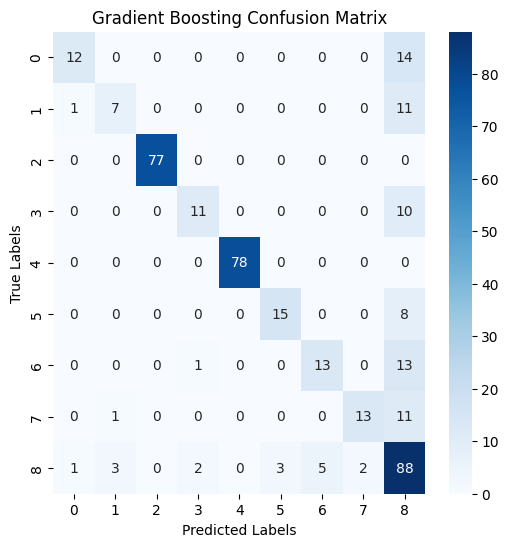

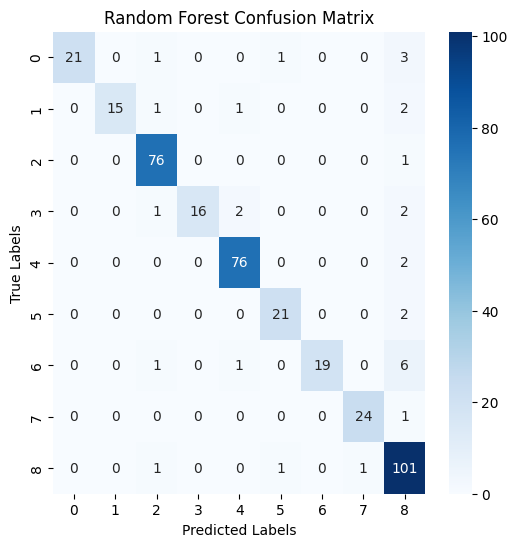

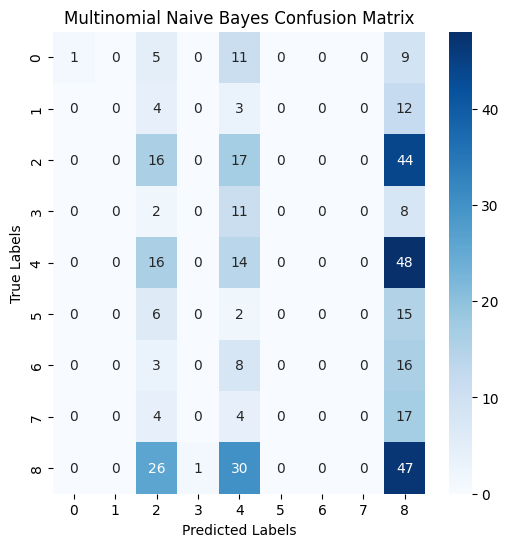

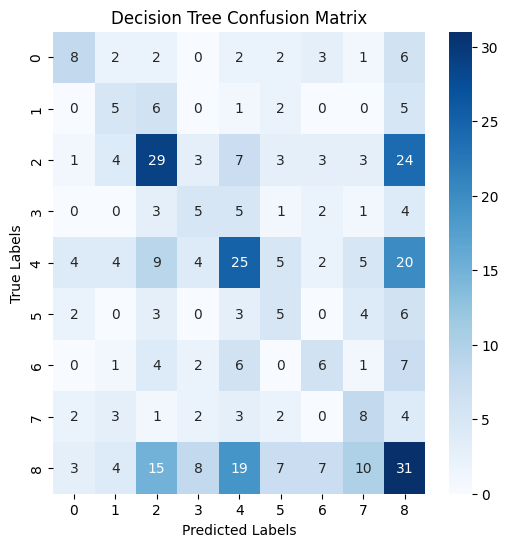

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükleyin (örneğin, bir Excel dosyası gibi)

# Tahmin etmek istediğiniz sütun
y = veri["Winner"][:2000]

# Tahmin etmek istediğiniz özellikleri seçin
X = veri.drop(columns=["Winner"], axis=1)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:2000, :], y, test_size=0.2, random_state=42)

# Modelleri oluşturma
gb_model = GradientBoostingClassifier()
rf_model = RandomForestClassifier()
nb_model = MultinomialNB()
dt_model = DecisionTreeClassifier()

# Modelleri eğitme
gb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Modellerden tahminler yapma
gb_preds = gb_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
nb_preds = nb_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

# Doğruluk değerlerini hesaplama
gb_accuracy = accuracy_score(y_test, gb_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)
nb_accuracy = accuracy_score(y_test, nb_preds)
dt_accuracy = accuracy_score(y_test, dt_preds)

# Karışıklık matrisleri
gb_cm = confusion_matrix(y_test, gb_preds)
rf_cm = confusion_matrix(y_test, rf_preds)
nb_cm = confusion_matrix(y_test, nb_preds)
dt_cm = confusion_matrix(y_test, dt_preds)

# Doğruluk değerlerini ekrana yazdırma
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Multinomial Naive Bayes Accuracy:", nb_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)

# Karışıklık matrislerini görselleştirme
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

plot_confusion_matrix(gb_cm, "Gradient Boosting Confusion Matrix")
plot_confusion_matrix(rf_cm, "Random Forest Confusion Matrix")
plot_confusion_matrix(nb_cm, "Multinomial Naive Bayes Confusion Matrix")
plot_confusion_matrix(dt_cm, "Decision Tree Confusion Matrix")




In [18]:
predictions = gb_model.predict(X[2001:5000])

In [23]:
predictions

array(['Draw', 'Draw', 'Draw', ..., 'Draw', '159Winner', '147Winner'],
      dtype=object)

In [24]:

import pandas as pd

# Örnek test verileri
test_data2 = {
    "Real_data":veri["Winner"][2001:5000],
    "Predictions": predictions
}

# Test verilerini DataFrame'e dönüştürme
df = pd.DataFrame(test_data2)

# DataFrame'i gösterme
print(df)

      Real_data Predictions
2001       Draw        Draw
2002       Draw        Draw
2003       Draw        Draw
2004       Draw        Draw
2005  147Winner        Draw
...         ...         ...
4995  357Winner   357Winner
4996  258Winner   258Winner
4997       Draw        Draw
4998  159Winner   159Winner
4999  147Winner   147Winner

[2999 rows x 2 columns]


In [25]:
df.to_excel("Submission_predict.xlsx", index=False)